In [1]:
%matplotlib notebook

# tree/simulation
from prosstt import simulation as sim
from prosstt.tree import Tree

# dimensionality reduction and visualization
import anndata as ad
from scanpy.api.tl import diffmap
import matplotlib.pyplot as plt

# make sure to use viridis as the default color map
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'viridis'

/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
t = Tree()
X, pseudotime, branch, scalings = sim.restricted_simulation(t)

/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


 |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.4% 

In [3]:
# normalize gene expression by library size
X = (X.transpose() / scalings).transpose()

<IPython.core.display.Javascript object>


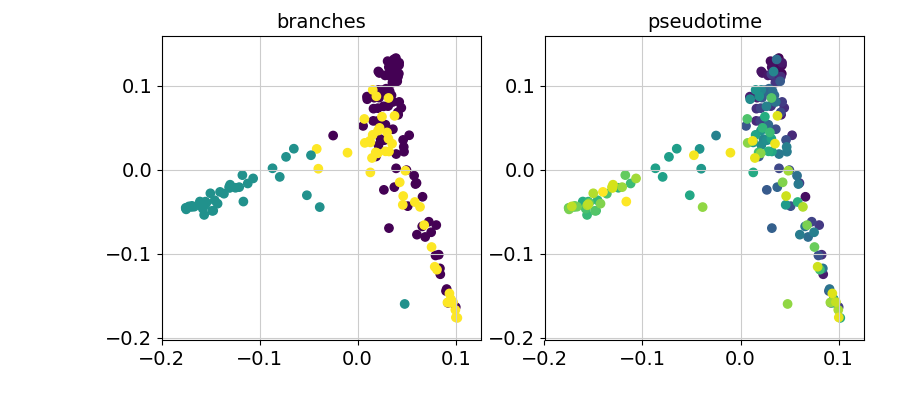

Text(0.5,1,'pseudotime')

In [4]:
# calculate a diffusion map and plot it
data = ad.AnnData(X)
diffmap(adata=data)
dm = data.obsm["X_diffmap"]

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(w=9, h=4)
ax[0].scatter(dm[:, 0], dm[:, 1], c=branch)
ax[0].set_title("branches")
ax[1].scatter(dm[:, 0], dm[:, 1], c=pseudotime)
ax[1].set_title("pseudotime")